In [1]:
#kütüphaneler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
#veri yukleme
veri=pd.read_csv("banknote.csv")
veri=pd.DataFrame(veri)
veri.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
veri.shape

(1372, 5)

In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
veri.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
data = veri.drop_duplicates(subset ="class",)
data

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
762,-1.3971,3.3191,-1.3927,-1.99480,1


In [7]:
veri.value_counts("class")

class
0    762
1    610
dtype: int64

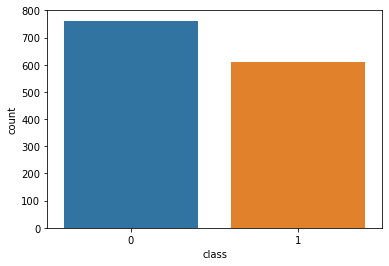

In [8]:
#Türler için bir sayım grafiği 
sns.countplot(x='class', data=veri, )
plt.show()

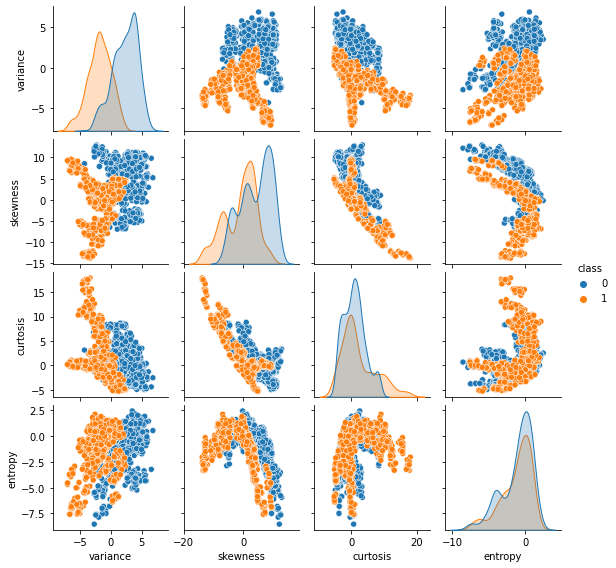

In [9]:
sns.pairplot(veri.drop([], axis = 1), 
             hue='class', height=2)

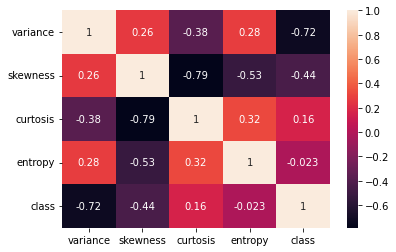

In [10]:
sns.heatmap(veri.corr(method='pearson').drop(
  [], axis=1).drop([], axis=0),
            annot = True);
  
plt.show()

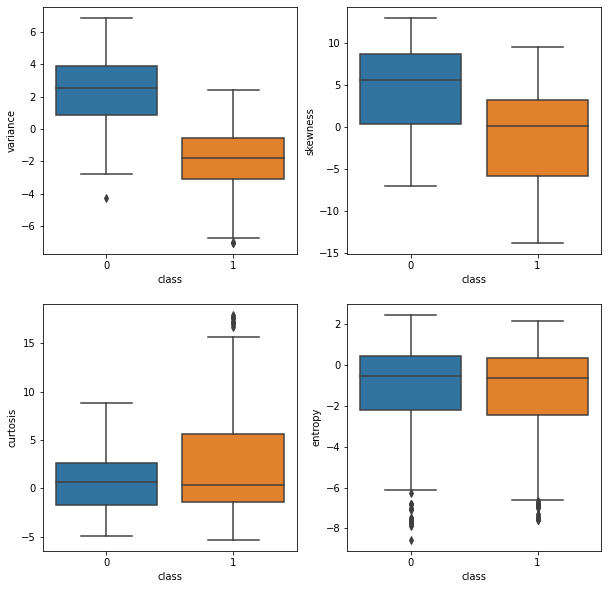

In [11]:
def graph(y):
    sns.boxplot(x="class", y=y, data=veri)
  
plt.figure(figsize=(10,10))
      
plt.subplot(221)
graph('variance')
  
plt.subplot(222)
graph('skewness')
  
plt.subplot(223)
graph('curtosis')
  
plt.subplot(224)
graph('entropy')
  
plt.show()

<AxesSubplot:xlabel='entropy'>

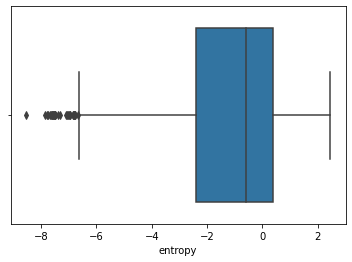

In [12]:
sns.boxplot(x='entropy', data=veri)

In [13]:
for column in veri.columns[1:-1]:
    for specy in veri["class"].unique():
        Specy_type = veri[veri["class"] == specy]
        Selected_column = Specy_type[column]
        q1 = Selected_column.quantile(0.23) # ilk çeyreği seçmek için
        q3 = Selected_column.quantile(0.77) # ikinci çeyreği seçmek için
        iqr = q3 - q1 # bu çeyrekler arası aralık
        upper_limit = q3 + 1.6 * iqr
        lower_limit = q1 - 1.6 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # aykırı değerler endekslerini seçme
        print(outlierss)
        veri.drop(index = outlierss, inplace=True) # aykırı değerleri düşürmek

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([291, 394, 465, 581], dtype='int64')
Int64Index([1203, 1264], dtype='int64')


<AxesSubplot:xlabel='entropy'>

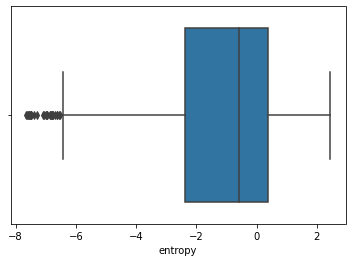

In [14]:
sns.boxplot(x='entropy', data=veri)

<AxesSubplot:xlabel='curtosis'>

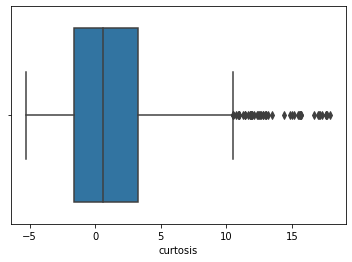

In [15]:
sns.boxplot(x='curtosis', data=veri)

In [16]:
for column in veri.columns[1:-1]:
    for specy in veri["class"].unique():
        Specy_type = veri[veri["class"] == specy]
        Selected_column = Specy_type[column]
        q1 = Selected_column.quantile(0.24) # ilk çeyreği seçmek için
        q3 = Selected_column.quantile(0.76) # ikinci çeyreği seçmek için
        iqr = q3 - q1 # bu çeyrekler arası aralık
        upper_limit = q3 + 1.6 * iqr
        lower_limit = q1 - 1.6 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # aykırı değerleri seçme
        print(outlierss)
        veri.drop(index = outlierss, inplace=True) # aykırı değerleri düşürmek

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([820, 942, 1064, 1125, 1369], dtype='int64')
Int64Index([45, 47, 194, 202, 529, 562, 740], dtype='int64')
Int64Index([974, 1142, 1157, 1218, 1279], dtype='int64')


<AxesSubplot:xlabel='curtosis'>

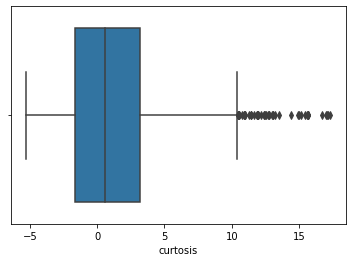

In [17]:
sns.boxplot(x='curtosis', data=veri)

<AxesSubplot:xlabel='variance'>

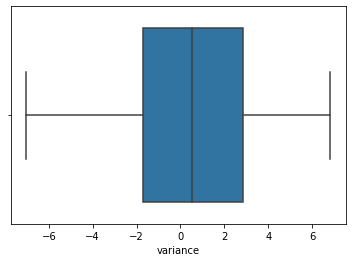

In [18]:
sns.boxplot(x='variance', data=veri)

<AxesSubplot:xlabel='skewness'>

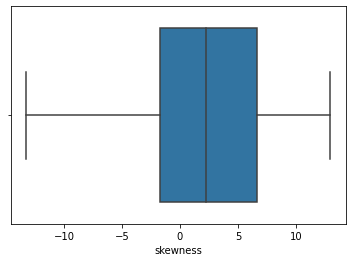

In [19]:
sns.boxplot(x='skewness', data=veri)

In [20]:
veri.shape

(1349, 5)

In [21]:
#test
print(veri)

x = veri.iloc[:,1:4].values #bağımsız değişkenler
y = veri.iloc[:,4:].values #bağımlı değişken
print(y)

      variance  skewness  curtosis  entropy  class
0      3.62160   8.66610  -2.80730 -0.44699      0
1      4.54590   8.16740  -2.45860 -1.46210      0
2      3.86600  -2.63830   1.92420  0.10645      0
3      3.45660   9.52280  -4.01120 -3.59440      0
4      0.32924  -4.45520   4.57180 -0.98880      0
...        ...       ...       ...      ...    ...
1366  -2.41000   3.74330  -0.40215 -1.29530      1
1367   0.40614   1.34920  -1.45010 -0.55949      1
1368  -1.38870  -4.87730   6.47740  0.34179      1
1370  -3.56370  -8.38270  12.39300 -1.28230      1
1371  -2.54190  -0.65804   2.68420  1.19520      1

[1349 rows x 5 columns]
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [22]:
#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [23]:
#verilerin olceklenmesi- standardizasyon
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [24]:
#normalizasyon
from sklearn.preprocessing import StandardScaler

# scaler objesi oluşturma
std_scaler = StandardScaler()
std_scaler
#veriyi normalize hale getirmek için -1,1 aralığına sığdırır
df_std = pd.DataFrame(std_scaler.fit_transform(veri), columns=veri.columns)

df_std

,variance,skewness,curtosis,entropy,class
0,1.111137,1.178701,-0.987090,0.330192,-0.892341
1,1.440150,1.092152,-0.904494,-0.182847,-0.892341
2,1.198133,-0.783175,0.133660,0.609902,-0.892341
3,1.052403,1.327381,-1.272258,-1.260516,-0.892341
4,-0.060809,-1.098498,0.760796,0.056360,-0.892341
...,...,...,...,...,...
1344,-1.035867,0.324350,-0.417383,-0.098546,1.120648
1345,-0.033436,-0.091146,-0.665610,0.273334,1.120648
1346,-0.672326,-1.171753,1.212175,0.728843,1.120648
1347,-1.446537,-1.780115,2.613403,-0.091976,1.120648


# KNN (K-Nearest Neighbors) (K-En Yakın Komşu) Algoritması Kullanımı

In [25]:
from sklearn.neighbors import KNeighborsClassifier
list=[]
metricListesi=['canberra', 'minkowski', 'euclidean', 'jaccard', 'hamming', 'chebyshev']
for i in range(1,11,2):
    for n in metricListesi:  
        knn = KNeighborsClassifier(n_neighbors=i, metric=n)
        knn.fit(x_train,y_train)
        y_pred = knn.predict(x_test)
        from sklearn.metrics import confusion_matrix,accuracy_score
        cm = confusion_matrix(y_test, y_pred) 
        x=(accuracy_score(y_test, y_pred))
        list.append(cm)
        list.append(x)
print( list )

[array([[204,  13],
       [ 10, 178]], dtype=int64), 0.9432098765432099, array([[207,  10],
       [  5, 183]], dtype=int64), 0.9629629629629629, array([[207,  10],
       [  5, 183]], dtype=int64), 0.9629629629629629, array([[  0, 217],
       [  0, 188]], dtype=int64), 0.4641975308641975, array([[ 49, 168],
       [ 39, 149]], dtype=int64), 0.4888888888888889, array([[207,  10],
       [  8, 180]], dtype=int64), 0.9555555555555556, array([[207,  10],
       [ 10, 178]], dtype=int64), 0.9506172839506173, array([[211,   6],
       [  8, 180]], dtype=int64), 0.9654320987654321, array([[211,   6],
       [  8, 180]], dtype=int64), 0.9654320987654321, array([[  0, 217],
       [  0, 188]], dtype=int64), 0.4641975308641975, array([[  9, 208],
       [  6, 182]], dtype=int64), 0.47160493827160493, array([[207,  10],
       [  8, 180]], dtype=int64), 0.9555555555555556, array([[206,  11],
       [ 16, 172]], dtype=int64), 0.9333333333333333, array([[210,   7],
       [ 11, 177]], dtype=int6

In [26]:
#verilerin olceklenmesi- standardizasyon
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [27]:
#normalizasyon
from sklearn.preprocessing import StandardScaler

# scaler objesi oluşturma
std_scaler = StandardScaler()
std_scaler
#veriyi normalize hale getirmek için -1,1 aralığına sığdırır
df_std = pd.DataFrame(std_scaler.fit_transform(veri), columns=veri.columns)

df_std

,variance,skewness,curtosis,entropy,class
0,1.111137,1.178701,-0.987090,0.330192,-0.892341
1,1.440150,1.092152,-0.904494,-0.182847,-0.892341
2,1.198133,-0.783175,0.133660,0.609902,-0.892341
3,1.052403,1.327381,-1.272258,-1.260516,-0.892341
4,-0.060809,-1.098498,0.760796,0.056360,-0.892341
...,...,...,...,...,...
1344,-1.035867,0.324350,-0.417383,-0.098546,1.120648
1345,-0.033436,-0.091146,-0.665610,0.273334,1.120648
1346,-0.672326,-1.171753,1.212175,0.728843,1.120648
1347,-1.446537,-1.780115,2.613403,-0.091976,1.120648


# SVM (Support Vector Machine) (Destek Vektör Makinesi) Algoritması Kullanımı

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[168  49]
 [ 22 166]]
Accuracy: 82.20 %
Standard Deviation: 3.55 %


In [30]:
#verilerin olceklenmesi- standardizasyon
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [31]:
#normalizasyon
from sklearn.preprocessing import StandardScaler

# scaler objesi oluşturma
std_scaler = StandardScaler()
std_scaler
#veriyi normalize hale getirmek için -1,1 aralığına sığdırır
df_std = pd.DataFrame(std_scaler.fit_transform(veri), columns=veri.columns)

df_std

,variance,skewness,curtosis,entropy,class
0,1.111137,1.178701,-0.987090,0.330192,-0.892341
1,1.440150,1.092152,-0.904494,-0.182847,-0.892341
2,1.198133,-0.783175,0.133660,0.609902,-0.892341
3,1.052403,1.327381,-1.272258,-1.260516,-0.892341
4,-0.060809,-1.098498,0.760796,0.056360,-0.892341
...,...,...,...,...,...
1344,-1.035867,0.324350,-0.417383,-0.098546,1.120648
1345,-0.033436,-0.091146,-0.665610,0.273334,1.120648
1346,-0.672326,-1.171753,1.212175,0.728843,1.120648
1347,-1.446537,-1.780115,2.613403,-0.091976,1.120648


# Gaussian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('GNB')
print(cm)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

GNB
[[162  55]
 [118  70]]
Accuracy: 0.5728395061728395


# Bernoulli Naive Bayes

In [33]:
from sklearn.naive_bayes import BernoulliNB
bNB = BernoulliNB()
bNB.fit(x_train, y_train)
BernoulliNB()

BernoulliNB()

In [34]:
y_pred = bNB.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

[[140  77]
 [ 70 118]]
Accuracy: 0.6370370370370371
